<a href="https://colab.research.google.com/github/vickyck/Vikas/blob/master/SIT742Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student ID: S224578589

Student Name: Vikas Krishnan

Attempted High Distinction: Yes

**Part I**

**Data Acquisition and Manipulation**

**Question 1.1**

Using PySpark to do some of the data wrangling process, so that: 1.1.1 For the ’NA’ in CustomerNo columns, change it to ’-1’.

In [ ]:
# Install the wget library to unzip compressed files
!pip install wget
!pip install pyspark
!pip install seaborn
!pip install matplotlib

**Read the input data**

In [ ]:
# Initialize the Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
# Unzip the gzip file from the GIT Hub and read to a CSV file using the spark initialized object to a dataframe
# Print the dataframe once read
!wget https://github.com/tulip-lab/sit742/raw/develop/Assessment/2024/data/transactionrecord.gz
!gunzip transactionrecord.gz
dfTxRecord = spark.read.csv("transactionrecord", header=True, inferSchema=True)
dfTxRecord.head()

--2024-09-28 13:29:16--  https://github.com/tulip-lab/sit742/raw/develop/Assessment/2024/data/transactionrecord.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2024/data/transactionrecord.gz [following]
--2024-09-28 13:29:16--  https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2024/data/transactionrecord.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6986544 (6.7M) [application/octet-stream]
Saving to: ‘transactionrecord.gz’

transactionrecord.g 100%[===================>]   6.66M  --.-KB/s    in 0.1s    

2024-09-28 13:29:17 (53.2 MB

Row(TransactionNo='581482', Date='12/9/2019', ProductNo='22485', ProductName='Set Of 2 Wooden Market Crates', Product_category='0ca', Price=21.47, Quantity=12, CustomerNo=17490, Country='United Kingdom')

In [ ]:
# Print top 20 rows of the dataframe
dfTxRecord.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

**1.1.1 For the ’NA’ in CustomerNo columns, change it to ’-1’.**

In [ ]:
# Print schema of the dataframe
dfTxRecord.printSchema()

root
 |-- TransactionNo: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- ProductNo: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Product_category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- CustomerNo: integer (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
# Fill Na values for the column: CustomerNo in the dataframe with -1
dfTxRecord.na.fill(value=-1, subset=["CustomerNo"]).show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

**1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows.**

In [ ]:
# Use regular expression to replace all the digits of a particular row of a given column with an empty value & add it as a new column to the same dataframe
# Print 1st 5 rows of the dataframe including the new column
from pyspark.sql.functions import regexp_replace, when
from pyspark.sql.types import IntegerType

dfTxRecord = dfTxRecord.withColumn("ProductName_Process", regexp_replace("ProductName", "\d+", ""))
dfTxRecord.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| ProductName_Process|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree T-Light Hold...|
|       581475|12/9/2019|    23239|Set Of 4 Knic

**Question 1.2**

Find out the revenue on each transaction date. In order to achieve the above, some wrangling work is required to be done:

**1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.**

In [ ]:
# Multiply the 2 columns: Price & Quantity
# Include a new column: "Revenue" to show the product value in the float format

dfTxRecord = dfTxRecord.withColumn("Revenue", (dfTxRecord["Price"] * dfTxRecord["Quantity"]).cast("float"))
dfTxRecord.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| ProductName_Process|Revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.64|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree T-Light Hold...| 

**1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.**

In [ ]:
# Import pandas package
# Use the pandas.to_datetime helper to transform the Date column value to a new Date field: Transaction_Date & print the 1st 5 rows of the dataframe
import pandas as pd
df = dfTxRecord.toPandas()
df['Transaction_Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue,Transaction_Date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09


**1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?**

In [ ]:
# Take the columns: Revenue & Transaction_Date to a new dataframe for further processing
import seaborn as sns

df_RevTxDate = pd.DataFrame(
    {'Revenue': df["Revenue"],
     'Transaction_Date': df["Transaction_Date"]})
df_RevTxDate.head()

,Revenue,Transaction_Date
0,257.640015,2019-12-09
1,383.399994,2019-12-09
2,138.360001,2019-12-09
3,127.800003,2019-12-09
4,71.639999,2019-12-09


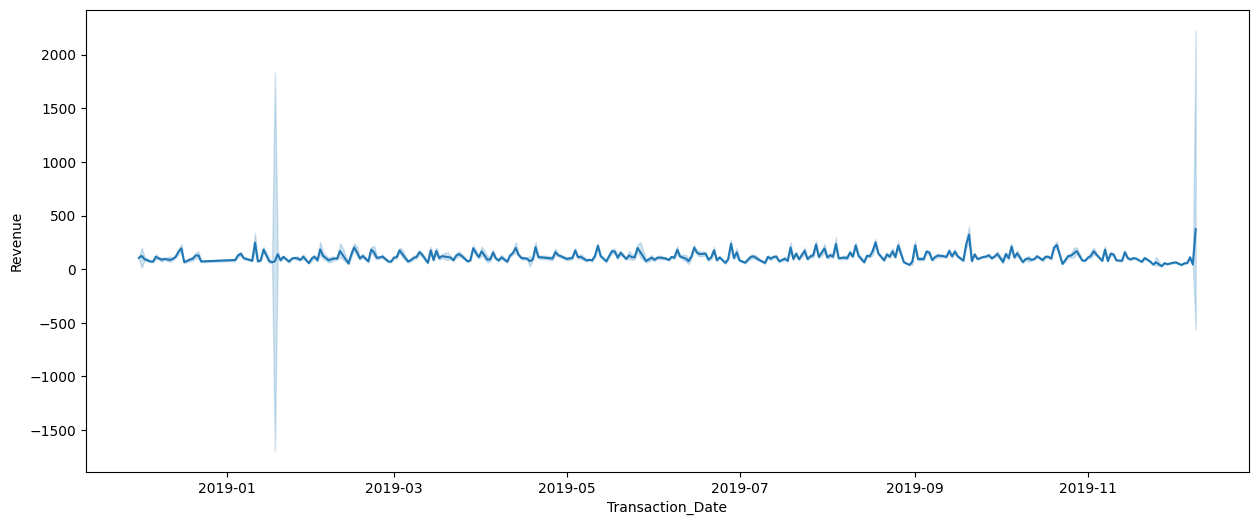

In [ ]:
# Plot the Revenue for the Transaction_Date
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.lineplot(x='Transaction_Date',y='Revenue',data=df_RevTxDate)
plt.show()

Observe significant revenues generated only on specific dates where the spikes are showing up

In [ ]:
# Group the dataframe by Transaction Date & compute the sum of revenue on the grouped data
summed_df = df_RevTxDate.groupby(['Transaction_Date'])['Revenue'].sum()
summed_df = pd.DataFrame(summed_df)
summed_df.head()

,Revenue
Transaction_Date,
2018-12-01,324649.218750
2018-12-02,260301.656250
2018-12-03,201975.187500
2018-12-05,196630.796875
2018-12-06,270656.875000


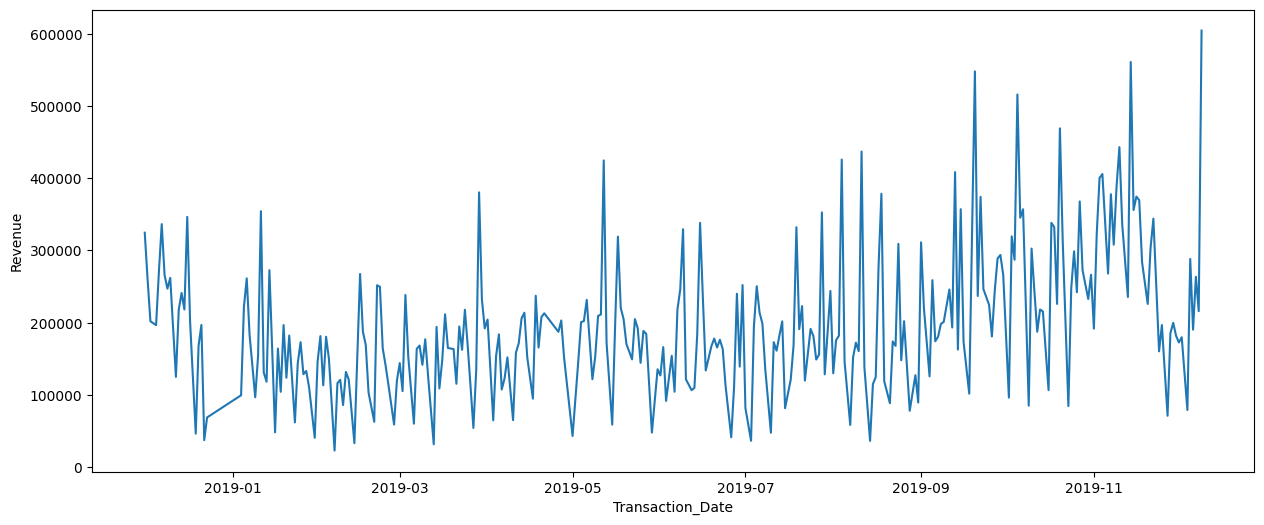

In [ ]:
# Plot the grouped sum of revenue dataframe on the line graph
plt.figure(figsize=(15,6))
sns.lineplot(x='Transaction_Date',y='Revenue',data=summed_df)
plt.show()

**As per the above graph, we can interpret that the Revenue factor is the maximum on the date: 2019-11 & holds a minimum value on the dae: 2019-01**

**Question 1.3**

Let’s continue to analyse on the transaction_date vs revenue.

**1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in a line chart with workday on averaged revenues).**

In [ ]:
# Include the name of the day of Transaction_Date to a new column in the dataframe
df['DayOfWeek'] = df['Transaction_Date'].dt.day_name()
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue,Transaction_Date,DayOfWeek
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003,2019-12-09,Monday
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday


In [ ]:
# Calculate average revenue per day by taking its mean
Average_Revenue = df.groupby('DayOfWeek')['Revenue'].mean()

In [ ]:
# Sort the Days of the Week
Average_Revenue = Average_Revenue.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

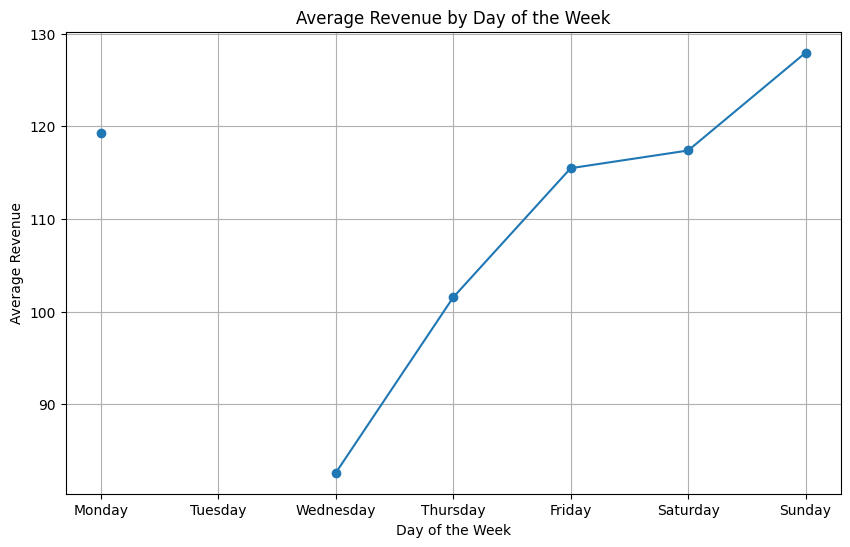

In [ ]:
# Plotting the graph against the calibrated values
plt.figure(figsize=(10, 6))
Average_Revenue.plot(kind='line', marker='o')
plt.title('Average Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

**From the above graph, we determine that Sunday is the day which generates the highest average revenue**

**1.3.2 Identify the name of product (column productName_process) that contributes the highest revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column productName_process) that has the highest sales volume (sum of the Quantity), no need to remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).**

In [ ]:
# Print the 1st 5 rows in the dataframe
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue,Transaction_Date,DayOfWeek
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003,2019-12-09,Monday
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday


In [ ]:
# Group the dataset based on the week along with the product name to compute the sum of revenue
# Filter values only for Sunday & sort it based on decending order to take the 1st record which holds the highest value
Average_Revenue_Product = df.groupby(['DayOfWeek', 'ProductName_Process'])['Revenue'].sum()
Average_Revenue_Product_Sunday = Average_Revenue_Product.Sunday
Average_Revenue_Product_Sunday.sort_values(ascending=False)

,Revenue
ProductName_Process,
World War Gliders Asstd Designs,187081.343750
Assorted Colour Bird Ornament,132705.609375
Popcorn Holder,117119.632812
Cream Hanging Heart T-Light Holder,108240.867188
Mini Paint Set Vintage,100676.757812
...,...
Card Holder Gingham Heart,-872.609985
Basket Of Toadstools,-1902.300415
Travel Card Wallet Dotcomgiftshop,-2050.000000


As per the above sorted data derived, we observe the product: "**World War Gliders Asstd Designs**" seems to have the highest sales interms of Revenue on Sunday

In [ ]:
# Group the dataset based on the week along with the product name to compute the sum of quantity
# Filter values only for Sunday & sort it based on decending order to take the 1st record which holds the highest value
Average_Revenue_Quantity = df.groupby(['DayOfWeek', 'ProductName_Process'])['Quantity'].sum()
Average_Revenue_Quantity_Product_Sunday = Average_Revenue_Quantity.Sunday
Average_Revenue_Quantity_Product_Sunday.sort_values(ascending=False)

,Quantity
ProductName_Process,
World War Gliders Asstd Designs,18051
Popcorn Holder,12232
Assorted Colour Bird Ornament,11409
Jumbo Bag Red Retrospot,11283
Mini Paint Set Vintage,9348
...,...
Pantry Chopping Board,-145
Basket Of Toadstools,-172
Travel Card Wallet Dotcomgiftshop,-200


As per the above sorted data calibrated, we observe the product: "**World War Gliders Asstd Designs**" seems to have the highest sales interms of Quantity on Sunday

**1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in general and top 5 products that have the highest sales volumes in general.**

In [ ]:
# Sort Top 5 records by Revenue
top_revenue = df.sort_values(by='Revenue', ascending=False).head(5)

In [ ]:
# Sort Top 5 records by Sales Volume
top_sales_volume = df.sort_values(by='Quantity', ascending=False).head(5)

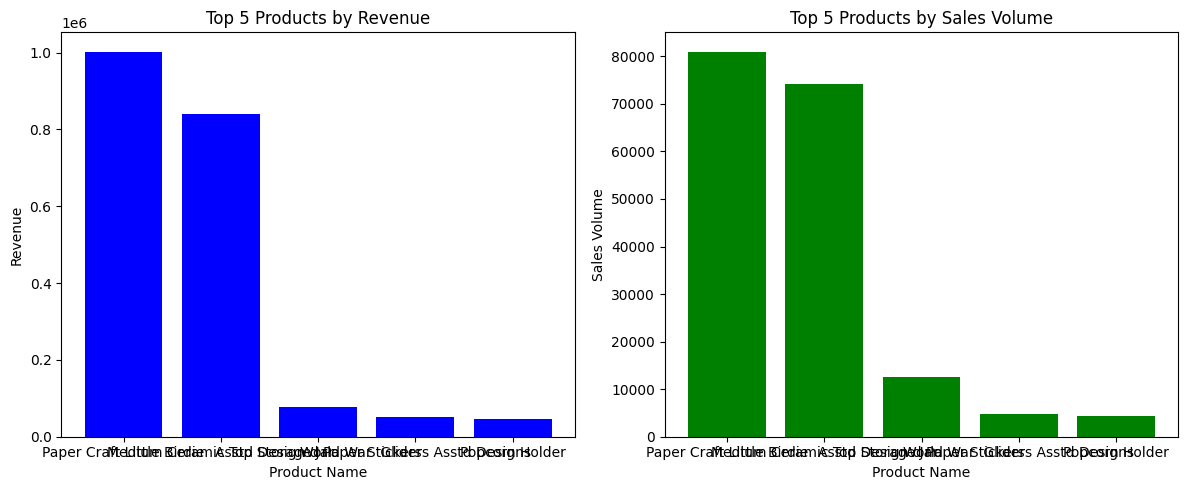

In [ ]:
# Plotting the Revenue & Sales factor
plt.figure(figsize=(12, 5))

# Plot for Revenue
plt.subplot(1, 2, 1)
plt.bar(top_revenue['ProductName_Process'], top_revenue['Revenue'], color='blue')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')

# Plot for Sales Volume
plt.subplot(1, 2, 2)
plt.bar(top_sales_volume['ProductName_Process'], top_sales_volume['Quantity'], color='green')
plt.title('Top 5 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

**Question 1.4**

**Which country generates the highest revenue? Additionally, identify the month in that country that has the highest revenue.**

In [ ]:
# Reference the previously computed revenue dataframe itself
top_revenue.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue,Transaction_Date,DayOfWeek
142,581483,12/9/2019,23843,Paper Craft Little Birdie,0ca,12.38,80995,16446,United Kingdom,Paper Craft Little Birdie,1.002718e+06,2019-12-09,Monday
473985,541431,1/18/2019,23166,Medium Ceramic Top Storage Jar,0ca,11.32,74215,12346,United Kingdom,Medium Ceramic Top Storage Jar,8.401138e+05,2019-01-18,Friday
41367,578841,11/25/2019,84826,Asstd Design 3d Paper Stickers,0ca,6.19,12540,13256,United Kingdom,Asstd Design d Paper Stickers,7.762260e+04,2019-11-25,Monday
117790,573008,10/27/2019,84077,World War 2 Gliders Asstd Designs,0ca,10.47,4800,12901,United Kingdom,World War Gliders Asstd Designs,5.025600e+04,2019-10-27,Sunday
331834,554868,5/27/2019,22197,Popcorn Holder,0ca,10.99,4300,13135,United Kingdom,Popcorn Holder,4.725700e+04,2019-05-27,Monday


From the previously computed data for the top revenue, we observe the country: "**United Kingdom**" generates the highest revenue

In [ ]:
# Include a new column at the end of the dataframe: "MonthOfYear" for the transaction date field
top_revenue['MonthOfYear'] = top_revenue['Transaction_Date'].dt.month_name()
top_revenue.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue,Transaction_Date,DayOfWeek,MonthOfYear
142,581483,12/9/2019,23843,Paper Craft Little Birdie,0ca,12.38,80995,16446,United Kingdom,Paper Craft Little Birdie,1.002718e+06,2019-12-09,Monday,December
473985,541431,1/18/2019,23166,Medium Ceramic Top Storage Jar,0ca,11.32,74215,12346,United Kingdom,Medium Ceramic Top Storage Jar,8.401138e+05,2019-01-18,Friday,January
41367,578841,11/25/2019,84826,Asstd Design 3d Paper Stickers,0ca,6.19,12540,13256,United Kingdom,Asstd Design d Paper Stickers,7.762260e+04,2019-11-25,Monday,November
117790,573008,10/27/2019,84077,World War 2 Gliders Asstd Designs,0ca,10.47,4800,12901,United Kingdom,World War Gliders Asstd Designs,5.025600e+04,2019-10-27,Sunday,October
331834,554868,5/27/2019,22197,Popcorn Holder,0ca,10.99,4300,13135,United Kingdom,Popcorn Holder,4.725700e+04,2019-05-27,Monday,May


We observe that in the month of "**December**", the revenue peak in the country: "**United Kingdom**"

**Question 1.5**

Let’s do some analysis on the CustomerNo and their transactions. Determine the shopping frequency of customers to identify who shops most frequently (find out the highest distinct count of transactionNo on customer level, be careful with those transactions that is not for shopping – filter those transaction quantity <= 0). Also, find out what products (column productName_process) ‘this customer’ typically buys based on the Quantity of products purchased.

In [ ]:
# Create the Pyspark dataframe from the regular pandas dataframe for performing SQL queries
from pyspark.sql import SQLContext, Row
sqlContext = SQLContext(spark)
df_Sql = sqlContext.createDataFrame(df)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
# Print the 1st 5 rows of the PySpark SQL dataframe
df_Sql.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+------------------+-------------------+---------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| ProductName_Process|           Revenue|   Transaction_Date|DayOfWeek|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+------------------+-------------------+---------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.6400146484375|2019-12-09 00:00:00|   Monday|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...| 383.3999938964844|2019-12-09 00:00:00|   Monday|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11

In [ ]:
# Create a temporary table which is the content of the dataframe itself
df_Sql.createTempView("SparkTransaction")

**Step-Wise formulation of the SQL query**:

**Filter Out Non-Shopping Transactions** -
First, we exclude transactions where the transaction quantity is less than or equal to zero, since these are not considered shopping transactions.

**Count the Distinct number of Transactions for Each Customer** -
For each customer, count the distinct transaction numbers that remain after filtering.

**Identify the Customer with the Highest Frequency performing the transactions** -
Find the customer with the highest count of distinct transaction numbers.




In [ ]:
# WHERE Quantity > 0: This condition exclues out any transactions that are not actual shopping transactions
# COUNT(DISTINCT TransactionNo): This factor counts the number of unique transaction numbers for each customer, which gives the frequency of shopping transactions
# GROUP BY customerID: This action groups the results by each customer, allowing you to count transactions per customer
# ORDER BY transactionCount DESC: Sorts results in descending order based on the transaction count, so the customer with the most transactions appears first.
# Limit 1: Takes the 1st record

df_FrequentTxs = spark.sql("SELECT CustomerNo, COUNT(DISTINCT TransactionNo) AS TransactionCount FROM SparkTransaction WHERE Quantity > 0 GROUP BY CustomerNo ORDER BY TransactionCount DESC LIMIT 1")
df_FrequentTxs.show()

+----------+----------------+
|CustomerNo|TransactionCount|
+----------+----------------+
|     12748|             207|
+----------+----------------+



In [ ]:
# Sort the products by the total quantity purchased in descending order to determine which products the customer typically buys the most.
# Take the top 1 record & print the same
df_FrequentProduct = spark.sql("SELECT ProductName_Process, SUM(Quantity) AS Total_Quantity FROM SparkTransaction GROUP BY ProductName_Process ORDER BY Total_Quantity DESC LIMIT 1")
df_FrequentProduct.show()

+-------------------+--------------+
|ProductName_Process|Total_Quantity|
+-------------------+--------------+
|     Popcorn Holder|         56450|
+-------------------+--------------+



**Question 1.6**

As the data scientist, you would like to build a basket-level analysis on the product customer buying (filter the ‘df’ dataframe with df[’Quantity’]>0). In this task, you need to:

**1.6.1** Group by the transactionNo and aggregate the category of product (column product_category) into list on transactionNo level. Similarly, group and aggregate name of product (column productName_process) into list on transactionNo level.

In [ ]:
# Print the 1st 5 rows of the Sql PySpark dataframe
df_Sql.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+------------------+-------------------+---------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| ProductName_Process|           Revenue|   Transaction_Date|DayOfWeek|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+------------------+-------------------+---------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.6400146484375|2019-12-09 00:00:00|   Monday|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...| 383.3999938964844|2019-12-09 00:00:00|   Monday|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11

In [ ]:
# ARRAY_AGG function is used to aggregate values into an array (or list) for each group defined by column: TransactionNo.
# Grouped the product categories & Product Names based on the Transaction Number usig the Array Aggregate function in SQL
# Print only the 1st 5 rows for readability
df_ProdTxAggregate = spark.sql("SELECT TransactionNo, ARRAY_AGG(Product_category) AS Product_Categories, ARRAY_AGG(ProductName_Process) AS Product_Names FROM SparkTransaction GROUP BY TransactionNo")
df_ProdTxAggregate.show(5)

+-------------+--------------------+--------------------+
|TransactionNo|  Product_Categories|       Product_Names|
+-------------+--------------------+--------------------+
|       536366|          [0ca, 0ca]|[Hand Warmer Unio...|
|       536367|[0ca, 0ca, 0ca, 0...|[Assorted Colour ...|
|       536371|               [0ca]|[Paper Chain Kit ...|
|       536374|               [0ca]|[Victorian Sewing...|
|       536375|[0ca, 0ca, 0ca, 0...|[Cream Hanging He...|
+-------------+--------------------+--------------------+
only showing top 5 rows



**1.6.2** Removing duplicates on adjacent elements in the list from product_category you obtained from 1.6.1, such as [product category 1, product category 1, product category 2, ...] will be processed as [product category 1, product category 2,....]. After this processing, there will be no duplicates on on adjacent elements in the list. Please save your processed dataframe as ‘df_1’ and print the top 10 rows.

In [ ]:
import numpy as np
# Function to remove adjacent duplicates
# Iterates through the list of categories and appends an element to the result list only if it is different from the last appended element.
def RemoveAdjacentDuplicates(categories):
    if not categories:
        return categories
    result = [categories[0]]
    for category in categories[1:]:
        if category != result[-1]:
            result.append(category)
    return result

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue,Transaction_Date,DayOfWeek
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003,2019-12-09,Monday
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday


In [ ]:
# Apply the function to the dataframe
# Processed list is then stored in a new column Processed_Category.
# Show the 1st 10 rows of the new dataframe holding the column: Processed_Category
# Save the processed dataframe as a new dataframe:'df_1'
df_1 = pd.DataFrame()
df_1["Processed_Category"] = RemoveAdjacentDuplicates(df['Product_category'].tolist())
df_1.head(10)

,Processed_Category
0,0ca
1,2ca
2,0ca
3,1ca
4,0ca
5,3ca
6,0ca
7,1ca
8,0ca
9,4ca


**Question 1.7**

Continue work on the results of question 1.6, now for each of the transaction, you will have a list of product categories. To further conduct the analysis, you need to finish below by using dataframe ‘df_1’:

**1.7.1** Create new column prod_len to find out the length of the list from product_category on each transaction. Print the first five rows of dataframe ‘df_1’.

In [ ]:
# Print the 1st 5 rows of the dataframe
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue,Transaction_Date,DayOfWeek
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003,2019-12-09,Monday
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday


In [ ]:
# Create a new column 'Prod_Len' to store the length of each list in 'Product_category' of the dataframe df & save it as a new column under the dataframe df_1
df_1['Prod_Len'] = df['Product_category'].apply(len)
df_1['Product_Category'] = df_1['Processed_Category']
df_1 = df_1.drop(columns=['Processed_Category'])
df_1.head()

,Prod_Len,Product_Category
0,3,0ca
1,3,2ca
2,3,0ca
3,3,1ca
4,3,0ca


**1.7.2** Transform the list in product_category from [productcategory1, productcategory2...] to ‘start > productcategory1 > productcategory2 > ... > conversion’ with new column path. You need to add ‘start’ as the first element, and ‘conversion’ as the last. Also you need to use ‘ > ’ to connect each of the transition on products (there is a space between the elements and the transition symbol >). The final format after the transition is given in example as below fig. 2. Define the function data_processing to achieve above with three arguments: df which is the dataframe name, maxlength with default value of 3 for filtering the dataframe with prod_len" <=maxlength and minlength with default value of 1 for filtering the dataframe with prod_len >=minlength. The function data_processing will return the new dataframe ‘df_2’. Run your defined function with dataframe ‘df_1’, maxlength = 5 and minlength = 2, print the dataframe ‘df_2’ with top 10 rows

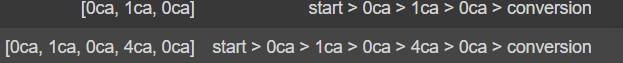

In [ ]:
import pandas as pd

def ProcessData(df, maxlength=3, minlength=1):
    # Calculate the length of each Product_Category list
    df['Prod_Len'] = df['Product_Category'].apply(len)

    # Filter the DataFrame based on maxlength and minlength
    df_filtered = df[(df['Prod_Len'] <= maxlength) & (df['Prod_Len'] >= minlength)]

    # Transform the Product_Category list into the desired path format
    df_filtered['Path'] = df_filtered['Product_Category'].apply(
        lambda x: 'start > ' + x + ' > conversion'
    )

    # Drop the prod_len column as it's no longer needed
    df_filtered = df_filtered.drop(columns=['Prod_Len'])

    return df_filtered

Explanation:
Find Length: Calculate the length of each Product_Category list and store it in a new column prod_len.

Filter DataFrame: We filter the DataFrame to include only those rows where the length of Product_Category is between minlength and maxlength.

Transform List to Path: We transform each Product_Category list into a string path starting with 'start' and ending with 'conversion', with each category separated by ' > '.

Drop Unnecessary Column: We drop the Prod_Len column since it is no longer needed after filtering.

Return New DataFrame: The function returns the filtered and transformed DataFrame df_2.

In [ ]:
# Run the data_processing function with the specified parameters
df_2 = ProcessData(df_1, maxlength=5, minlength=2)
df_2.head(10)

,Product_Category,Path
0,0ca,start > 0ca > conversion
1,2ca,start > 2ca > conversion
2,0ca,start > 0ca > conversion
3,1ca,start > 1ca > conversion
4,0ca,start > 0ca > conversion
5,3ca,start > 3ca > conversion
6,0ca,start > 0ca > conversion
7,1ca,start > 1ca > conversion
8,0ca,start > 0ca > conversion
9,4ca,start > 4ca > conversion



This code will print the top 10 rows of the transformed DataFrame df_2. Adjust the data dictionary to match your actual data structure

**Question 1.8**

Continue to work on the results of question 1.7, the dataframe ‘df_2’, we would like to build the transition matrix together, but before we actually conduct the programming, we will need to finish few questions for exploration:

**1.8.1** Check on your transaction level basket with results from question 1.7, could you please find out respectively how many transactions ended with pattern ‘... > 0ca > conversion’ / ‘... > 1ca > conversion’ / ‘... > 2ca > conversion’ / ‘... > 3ca > conversion’ / ‘... > 4ca > conversion’ (1 result for each pattern, total 5 results are expected).

In [ ]:
# Match the text patterns of the dataframe by comparing with the end of string of each row
patterns = ['> 0ca > conversion', '1ca > conversion', ' 2ca > conversion', '3ca > conversion', '4ca > conversion']
results = {}
for pattern in patterns:
  count = df_2['Path'].str.endswith(f'{pattern}').sum()
  results[pattern] = count

print(results)

{'> 0ca > conversion': 4466, '1ca > conversion': 1375, ' 2ca > conversion': 1259, '3ca > conversion': 513, '4ca > conversion': 1338}


Need to search for transactions that end with the specified patterns:

'> 0ca > conversion', '1ca > conversion', ' 2ca > conversion', '3ca > conversion', '4ca > conversion'

**1.8.2 **

Check on your transaction level basket with results from question 1.7, could you please find out respectively how many times the transactions contains ‘0ca > 0ca’ / ‘0ca > 1ca’ / ‘0ca > 2ca’ / ‘0ca > 3ca’ / ‘0ca > 4ca’ / ‘0ca > conversion’ in the whole data (1 result for each pattern, total 6 results are expected and each transaction could contain those patterns multiple times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times with pattern ‘0ca > 1ca’, if there is not any, then return 0, you need to sum the counts from each transaction to return the final value).

In [ ]:
# Print the 1st 5 rows of the dataframe
df_2.head()

,Product_Category,Path
0,0ca,start > 0ca > conversion
1,2ca,start > 2ca > conversion
2,0ca,start > 0ca > conversion
3,1ca,start > 1ca > conversion
4,0ca,start > 0ca > conversion


In [ ]:
# Define the patterns
patterns = ['0ca > 0ca', '0ca > 1ca', '0ca > 2ca', '0ca > 3ca', '0ca > 4ca', '0ca > conversion']

# Initialize a dictionary to store the counts of each pattern
pattern_counts = {pattern: 0 for pattern in patterns}
pattern_counts

{'0ca > 0ca': 0,
 '0ca > 1ca': 0,
 '0ca > 2ca': 0,
 '0ca > 3ca': 0,
 '0ca > 4ca': 0,
 '0ca > conversion': 0}

In [ ]:
# Function to count occurrences of a pattern in a transaction
def CountPattern(transaction, pattern):
    count = 0
    if (pattern in transaction):
      count += 1
    return count

In [ ]:
# Iterate over each transaction and count the patterns
transactions = df_2["Path"]
for transaction in transactions:
    for pattern in patterns:
        pattern_counts[pattern] += CountPattern(transaction, pattern)

In [ ]:
# Print the final counts
for pattern, count in pattern_counts.items():
    print(f"{pattern}: {count}")

0ca > 0ca: 0
0ca > 1ca: 0
0ca > 2ca: 0
0ca > 3ca: 0
0ca > 4ca: 0
0ca > conversion: 4466


**1.8.3** Check on your transaction level basket with results from task question 1.7, could you please find out how many times the transactions contains ‘...> 0ca > ...’ in the whole data (1 result is expected and each transaction could contain the pattern multiple times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times, you need to sum the counts from each transaction to return the final value).

In [ ]:
transactions = df_2["Path"]

# Initialize a counter for the total occurrences
total_count = 0

# Iterate through each transaction
for transaction in transactions:
    # Count occurrences of the pattern in the current transaction
    count = transaction.count("> 0ca >")
    # Add to the total count
    total_count += count

# Output the total count
print("Total occurrences of '> 0ca >':", total_count)

Total occurrences of '> 0ca >': 4466


**1.8.4** Use the 6 results from 1.8.2 to divide the result from 1.8.3 and then sum all of them and return the value.

Hint: you might consider to use endswith and count functions from default python 3.

In [ ]:
# Example data from sections 1.8.2 and 1.8.3
results_1_8_2 = [0, 0, 0, 0, 0, 8932]  # Example list from section 1.8.2
result_1_8_3 = 4466  # Example single result from section 1.8.3

# Step 1: Divide each element in results_1_8_2 by result_1_8_3
divided_results = [x / result_1_8_3 for x in results_1_8_2]

# Step 2: Sum all the divided results
total_sum = sum(divided_results)

# Output the total sum
print(f"Total sum of divided results: {total_sum}")

Total sum of divided results: 2.0


**Question 1.9**

Let’s now look at the question 1.6 again, you have the list of product and list of product category for each transaction. We will use the transactionNo and productName_process to conduct the Association rule learning.

**1.9.1** Work on the dataframe df from question 1.2 (filter out the transaction with negative quantity value and also only keep those top 100 products by ranking the sum of quantity) and build the transaction level product dataframe (each row represents transactionNo and productName_process become the columns, the value in the column is the Quantity). Hint: you might consider to use pivot function in pandas.

In [ ]:
# Refer to the dataframe from Question#2
dfTxRecord.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| ProductName_Process|Revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.64|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree T-Light Hold...| 

In [ ]:
# Filter out transactions with negative quantity & print the 1st 10 rows
df_filtered_QOnePoint9 = dfTxRecord[dfTxRecord['Quantity'] > 0]
df_filtered_QOnePoint9.show(10)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| ProductName_Process|Revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.64|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree T-Light Hold...| 

In [ ]:
# Calculate the sum of quantities for each product
import pandas as pd
pd_df_filtered_QOnePoint9 = df_filtered_QOnePoint9.toPandas()

Product_Quantity_Sum_QOnePoint9 = pd_df_filtered_QOnePoint9.groupby(['ProductName_Process'])['Quantity'].sum()
Product_Quantity_Sum_QOnePoint9.head()

,Quantity
ProductName_Process,
Bendy Skull Straws,661
Birds Canvas Screen,2
Black Cats W Hearts Blank Card,24
Black Petit Four Cases,58
Blue Dinner Candles Silver Flock,88


In [ ]:
# Get the top 100 products by quantity
Top_100_Products = Product_Quantity_Sum_QOnePoint9.nlargest(100).index
Top_100_Products

Index(['Paper Craft Little Birdie', 'Medium Ceramic Top Storage Jar',
       'Popcorn Holder', 'World War  Gliders Asstd Designs',
       'Jumbo Bag Red Retrospot', 'Cream Hanging Heart T-Light Holder',
       'Pack Of  Retrospot Cake Cases', 'Assorted Colour Bird Ornament',
       'Rabbit Night Light', 'Mini Paint Set Vintage',
       'Pack Of  London Tissues', 'Pack Of  Pink Paisley Cake Cases',
       'Victorian Glass Hanging T-Light', 'Assorted Colours Silk Fan',
       'Brocade Ring Purse', 'Red Harmonica In Box', 'Jumbo Bag Pink Polkadot',
       'Jumbo Bag Vintage Doily', 'Lunch Bag Red Retrospot',
       'Paper Chain Kit 'S Christmas', 'Antique Silver T-Light Glass',
       'Party Bunting', ' Teatime Fairy Cake Cases',
       'Charlotte Bag Suki Design', 'Heart Of Wicker Small',
       'Red Retrospot Charlotte Bag', 'Jumbo Bag Strawberry',
       'Colour Glass T-Light Holder Hanging', 'Jam Making Set Printed',
       'Grow A Flytrap Or Sunflower In Tin', ' Cake Cases Vintage Ch

In [ ]:
# Filter the dataframe to keep only the top 100 products
df_Top_Products = pd_df_filtered_QOnePoint9[pd_df_filtered_QOnePoint9['ProductName_Process'].isin(Top_100_Products)]
df_Top_Products.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,0ca,10.65,24,13069,United Kingdom,Bag g Swirly Marbles,255.600006
25,581476,12/9/2019,23166,Medium Ceramic Top Storage Jar,0ca,11.32,48,12433,Norway,Medium Ceramic Top Storage Jar,543.359985
30,581476,12/9/2019,22998,Travel Card Wallet Keep Calm,0ca,10.68,72,12433,Norway,Travel Card Wallet Keep Calm,768.960022
38,581476,12/9/2019,22693,Grow A Flytrap Or Sunflower In Tin,0ca,11.34,192,12433,Norway,Grow A Flytrap Or Sunflower In Tin,2177.280029
45,581476,12/9/2019,22197,Popcorn Holder,0ca,10.99,100,12433,Norway,Popcorn Holder,1099.000000


In [ ]:
# Pivot the dataframe
df_Transaction_Product = df_Top_Products.pivot_table(
    index='TransactionNo',
    columns='ProductName_Process',
    values='Quantity',
    fill_value=0
)

In [ ]:
# Print the dataframe
df_Transaction_Product.head(10)

ProductName_Process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,"""""""Assorted Flower Colour """"""""Leis""""""""""""""",Aged Glass Silver T-Light Holder,Antique Silver T-Light Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging T-Light,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536378,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**1.9.2** Run the apriori algorithm to identify items with minimum support of 1.5% (only looking at baskets with 4 or more items). Hint: you might consider to use mlxtend.frequent_patterns to run apriori rules.

In [ ]:
# Refer to the pandas dataframe from Q1.9
df_Top_Products.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,0ca,10.65,24,13069,United Kingdom,Bag g Swirly Marbles,255.600006
25,581476,12/9/2019,23166,Medium Ceramic Top Storage Jar,0ca,11.32,48,12433,Norway,Medium Ceramic Top Storage Jar,543.359985
30,581476,12/9/2019,22998,Travel Card Wallet Keep Calm,0ca,10.68,72,12433,Norway,Travel Card Wallet Keep Calm,768.960022
38,581476,12/9/2019,22693,Grow A Flytrap Or Sunflower In Tin,0ca,11.34,192,12433,Norway,Grow A Flytrap Or Sunflower In Tin,2177.280029
45,581476,12/9/2019,22197,Popcorn Holder,0ca,10.99,100,12433,Norway,Popcorn Holder,1099.000000


In [ ]:
# One-hot encode the data
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
# Sort Top 10 records by Revenue
# Take only top 10 records by Revenue considering the performance overhead with Apriori
df_Top_Products = df_Top_Products.sort_values(by='Revenue', ascending=False).head(10)

te_ary = te.fit(df_Top_Products['ProductName_Process']).transform(df_Top_Products['ProductName_Process'])
df_OneHotEnc = pd.DataFrame(te_ary, columns=te.columns_)
df_OneHotEnc.head()

,,A,B,C,D,F,G,H,J,L,...,l,m,n,o,p,r,s,t,u,y
0,True,False,True,True,False,False,False,False,False,True,...,True,False,False,False,True,True,False,True,False,False
1,True,False,False,True,False,False,False,False,True,False,...,False,True,False,True,True,True,False,True,True,False
2,True,True,False,False,True,False,False,False,False,False,...,False,False,True,False,True,True,True,True,False,False
3,True,True,False,False,True,False,True,False,False,False,...,True,False,True,True,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,...,True,False,True,True,True,True,False,False,False,False


In [ ]:
# Filter baskets with 4 or more items
df_Filtered = df_OneHotEnc[df_OneHotEnc.sum(axis=1) >= 4]
df_Filtered.head()

,,A,B,C,D,F,G,H,J,L,...,l,m,n,o,p,r,s,t,u,y
0,True,False,True,True,False,False,False,False,False,True,...,True,False,False,False,True,True,False,True,False,False
1,True,False,False,True,False,False,False,False,True,False,...,False,True,False,True,True,True,False,True,True,False
2,True,True,False,False,True,False,False,False,False,False,...,False,False,True,False,True,True,True,True,False,False
3,True,True,False,False,True,False,True,False,False,False,...,True,False,True,True,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,...,True,False,True,True,True,True,False,False,False,False


In [ ]:
# Run the Apriori Algorithm
# Use the apriori function from mlxtend.frequent_patterns to find frequent itemsets with a minimum support of 1.5%.

from mlxtend.frequent_patterns import apriori, association_rules

# Run Apriori
frequent_itemsets = apriori(df_Filtered, min_support=0.015, use_colnames=True)

# Display the results
frequent_itemsets

,support,itemsets
0,1.0,( )
1,0.6,(A)
2,0.2,(B)
3,0.6,(C)
4,0.3,(D)
...,...,...
764882,0.1,"(r, t, , i, p, u, J, T, d, m, a, g, C, e, S, ..."
764883,0.1,"(r, t, , i, p, u, T, d, m, a, g, M, C, e, S, ..."
764884,0.1,"(r, t, , i, p, u, J, T, d, m, a, g, M, e, S, ..."
764885,0.1,"(r, t, i, p, u, J, T, d, m, a, g, M, C, e, S, ..."


**1.9.3** Run the apriori algorithm to find the items with support >= 1.0% and lift > 10.

In [ ]:
# Use the previous dataframe
df_Filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,A,B,C,D,F,G,H,J,L,...,l,m,n,o,p,r,s,t,u,y
0,True,False,True,True,False,False,False,False,False,True,...,True,False,False,False,True,True,False,True,False,False
1,True,False,False,True,False,False,False,False,True,False,...,False,True,False,True,True,True,False,True,True,False
2,True,True,False,False,True,False,False,False,False,False,...,False,False,True,False,True,True,True,True,False,False
3,True,True,False,False,True,False,True,False,False,False,...,True,False,True,True,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,...,True,False,True,True,True,True,False,False,False,False


In [ ]:
# Run Apriori with min_support=1% & min_lift=10
# Print results
!pip install apyori
from apyori import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=9d7f50bba5ea98305b10bea32fc4bf0cdec528729d3511799f85b67f7fb1f512
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


<generator object apriori at 0x7b08b8eeccf0>

In [ ]:
# Convert the PySpark dataframe to pandas dataframe
df_Filtered = dfTxRecord.toPandas()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):


In [ ]:
# Print the 1st 5 rows of the dataframe
df_Filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999


In [ ]:
# Take the top 20 records sorted by highest revenue considering the performance overhead with Apriori algorithm
# Apriori performs better with relatively smaller datasets
df_Filtered = df_Filtered.sort_values(by='Revenue', ascending=False).iloc[:20]
df_Filtered.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 11)

In [ ]:
# Consider only the 2 columns: ProductName_Process & TransactionNo for processing
df_Filtered = df_Filtered[['ProductName_Process', 'TransactionNo']]
df_Filtered.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 2)

In [ ]:
# Print the dataframe
df_Filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ProductName_Process,TransactionNo
142,Paper Craft Little Birdie,581483
473985,Medium Ceramic Top Storage Jar,541431
41367,Asstd Design d Paper Stickers,578841
117790,World War Gliders Asstd Designs,573008
331834,Popcorn Holder,554868


In [ ]:
# Convert entries of the dataframe to a string list to be supplied as argument for the Apriori algorithm
transactions = []
for i in range(0, 20):
    transactions.append([str(df_Filtered.values[i, j]) for j in range(0, 2)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train the apriori algorithm with the expected criteria: min_support=0.01, min_lift=10
# Print the association rules calibrated
rules = apriori(transactions = transactions, min_support=0.01, min_lift=10, use_colnames=True, min_length = 4, max_length = 4)
results = list(rules)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({'539101', 'Grow A Flytrap Or Sunflower In Tin'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'539101'}), items_add=frozenset({'Grow A Flytrap Or Sunflower In Tin'}), confidence=1.0, lift=10.0), OrderedStatistic(items_base=frozenset({'Grow A Flytrap Or Sunflower In Tin'}), items_add=frozenset({'539101'}), confidence=0.5, lift=10.0)]),
 RelationRecord(items=frozenset({'Medium Ceramic Top Storage Jar', '541431'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'541431'}), items_add=frozenset({'Medium Ceramic Top Storage Jar'}), confidence=1.0, lift=20.0), OrderedStatistic(items_base=frozenset({'Medium Ceramic Top Storage Jar'}), items_add=frozenset({'541431'}), confidence=1.0, lift=20.0)]),
 RelationRecord(items=frozenset({'543669', 'Grow A Flytrap Or Sunflower In Tin'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'543669'}), items_add=frozenset({'Grow A Flytrap Or Sunflo

In [ ]:
# Method to summarize the results of the association extracted from apriori
def inspect(results):
    lhs         =[tuple(result[2][0][0])[0] for result in results]
    rhs         =[tuple(result[2][0][1])[0] for result in results]
    supports    =[result[1] for result in results]
    confidences =[result[2][0][2] for result in results]
    lifts        =[result[2][0][3] for result in results]
    return list (zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ["Left hand side", "Right hand side", "Support", "Confidence", "Lift"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print Apriori summary
resultsinDataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left hand side,Right hand side,Support,Confidence,Lift
0,539101,Grow A Flytrap Or Sunflower In Tin,0.05,1.0,10.0
1,541431,Medium Ceramic Top Storage Jar,0.05,1.0,20.0
2,543669,Grow A Flytrap Or Sunflower In Tin,0.05,1.0,10.0
3,544152,Essential Balm g Tin In Envelope,0.05,1.0,10.0
4,544612,Empire Design Rosette,0.05,1.0,20.0
5,554272,Pack Of Pink Paisley Cake Cases,0.05,1.0,20.0
6,554868,Popcorn Holder,0.05,1.0,20.0
7,560599,Essential Balm g Tin In Envelope,0.05,1.0,10.0
8,562439,Assorted Colour Bird Ornament,0.05,1.0,20.0
9,573003,Rabbit Night Light,0.05,1.0,20.0


**1.9.4** Please explore three more examples with different support / confidence / lift measurements (you could leverage your rule mining with one of the three measurements or all of them) to find out any of the interesting patterns from the Association rule learning. Save your code and results in a clean and tidy format and writing down your insights.

**Example#1:**

**Support**: 0.2 (20% of transactions contain both items)

**Confidence**: 0.6 (60% of transactions containing the antecedent also contain the consequent)

**Lift**: 1.1 (The items are slightly more likely to be bought together than if they were independent)

In [ ]:
# Train the apriori algorithm with the expected criteria: min_support=0.02, Confidence=0.6, min_lift=1.1
# Print the association rules calibrated
rules = apriori(transactions = transactions, min_support=0.02, min_confidence=0.6, min_lift=1.1, use_colnames=True, min_length = 4, max_length = 4)
results = list(rules)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({'536830', 'World War  Gliders Asstd Designs'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'536830'}), items_add=frozenset({'World War  Gliders Asstd Designs'}), confidence=1.0, lift=6.666666666666667)]),
 RelationRecord(items=frozenset({'539101', 'Grow A Flytrap Or Sunflower In Tin'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'539101'}), items_add=frozenset({'Grow A Flytrap Or Sunflower In Tin'}), confidence=1.0, lift=10.0)]),
 RelationRecord(items=frozenset({'Medium Ceramic Top Storage Jar', '541431'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'541431'}), items_add=frozenset({'Medium Ceramic Top Storage Jar'}), confidence=1.0, lift=20.0), OrderedStatistic(items_base=frozenset({'Medium Ceramic Top Storage Jar'}), items_add=frozenset({'541431'}), confidence=1.0, lift=20.0)]),
 RelationRecord(items=frozenset({'543057', 'World War  Gliders Asstd Designs'}), suppo

In [ ]:
# Summarize the results
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ["Left hand side", "Right hand side", "Support", "Confidence", "Lift"])
resultsinDataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left hand side,Right hand side,Support,Confidence,Lift
0,536830,World War Gliders Asstd Designs,0.05,1.0,6.666667
1,539101,Grow A Flytrap Or Sunflower In Tin,0.05,1.0,10.000000
2,541431,Medium Ceramic Top Storage Jar,0.05,1.0,20.000000
3,543057,World War Gliders Asstd Designs,0.05,1.0,6.666667
4,543669,Grow A Flytrap Or Sunflower In Tin,0.05,1.0,10.000000
5,544152,Essential Balm g Tin In Envelope,0.05,1.0,10.000000
6,544612,Empire Design Rosette,0.05,1.0,20.000000
7,554272,Pack Of Pink Paisley Cake Cases,0.05,1.0,20.000000
8,554868,Popcorn Holder,0.05,1.0,20.000000
9,560599,Essential Balm g Tin In Envelope,0.05,1.0,10.000000


**Insights**:

The rule with high support indicates that the combination of items is common in the dataset.

Moderate confidence suggests a decent likelihood of co-occurrence.

Low lift indicates that the items are not strongly associated beyond random chance.

**Example 2**: Low Support, High Confidence, High Lift

**Support**: 0.05 (5% of transactions contain both items)

**Confidence**: 0.9 (90% of transactions containing the antecedent also contain the consequent)

**Lift**: 3.0 (The items are three times more likely to be bought together than if they were independent)

In [ ]:
# Train the apriori algorithm with the expected criteria: min_support=0.05, Confidence=0.9, min_lift=3
# Print the association rules calibrated
rules = apriori(transactions = transactions, min_support=0.05, min_confidence=0.9, min_lift=3, use_colnames=True, min_length = 4, max_length = 4)
results = list(rules)

# Summarize the results
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ["Left hand side", "Right hand side", "Support", "Confidence", "Lift"])
resultsinDataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left hand side,Right hand side,Support,Confidence,Lift
0,536830,World War Gliders Asstd Designs,0.05,1.0,6.666667
1,539101,Grow A Flytrap Or Sunflower In Tin,0.05,1.0,10.000000
2,541431,Medium Ceramic Top Storage Jar,0.05,1.0,20.000000
3,543057,World War Gliders Asstd Designs,0.05,1.0,6.666667
4,543669,Grow A Flytrap Or Sunflower In Tin,0.05,1.0,10.000000
5,544152,Essential Balm g Tin In Envelope,0.05,1.0,10.000000
6,544612,Empire Design Rosette,0.05,1.0,20.000000
7,554272,Pack Of Pink Paisley Cake Cases,0.05,1.0,20.000000
8,554868,Popcorn Holder,0.05,1.0,20.000000
9,560599,Essential Balm g Tin In Envelope,0.05,1.0,10.000000


**Insights**:

Low support indicates that the combination is rare.

High confidence and lift suggest a strong association, making it a potentially valuable niche market.

**Example 3**:

Moderate Support, Low Confidence

**Support**: 0.05 (5% of transactions contain both items)

**Confidence**: 0.4 (40% of transactions containing the antecedent also

In [ ]:
# Train the apriori algorithm with the expected criteria: min_support=0.05, Confidence=0.4
# Print the association rules calibrated
rules = apriori(transactions = transactions, min_support=0.05, min_confidence=0.4, use_colnames=True, min_length = 4, max_length = 4)
results = list(rules)

# Summarize the results
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ["Left hand side", "Right hand side", "Support", "Confidence", "Lift"])
resultsinDataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left hand side,Right hand side,Support,Confidence,Lift
0,536830,World War Gliders Asstd Designs,0.05,1.0,6.666667
1,539101,Grow A Flytrap Or Sunflower In Tin,0.05,1.0,10.000000
2,540815,Cream Hanging Heart T-Light Holder,0.05,0.5,5.000000
3,540815,Fairy Cake Flannel Assorted Colour,0.05,0.5,5.000000
4,541431,Medium Ceramic Top Storage Jar,0.05,1.0,20.000000
5,543057,World War Gliders Asstd Designs,0.05,1.0,6.666667
6,543669,Grow A Flytrap Or Sunflower In Tin,0.05,1.0,10.000000
7,544152,Essential Balm g Tin In Envelope,0.05,1.0,10.000000
8,544612,Empire Design Rosette,0.05,1.0,20.000000
9,550461,Cream Hanging Heart T-Light Holder,0.05,0.5,5.000000


**Insights**:

Moderate support indicates that the combination is not that rare.

Medium confidence suggest a moderate association, making it a likely item to the market.

**Question 1.10**

After we finished the Association rule learning, it is a time for us to consider to do customer analysis based on their shopping behaviours.

**1.10.1**

Work on the dataframe df from question 1.2 and build the customer product dataframe (each row represents single customerNo and productName_process become as the columns, the value in the columns is the aggregated Quantity value from all transactions and the result is a N by M matrix where N is the number of distinct customerNo and M is the number of distinct productName_process. Please filter out the transaction with negative quantity value and also only keep those top 100 product by ranking the sum of quantity).

In [ ]:
# Refer to the original dataset & convert to pandas
df = dfTxRecord.toPandas()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):


,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999


In [ ]:
# Filter out transactions with negative quantity
df_filtered = df[df['Quantity'] > 0]
df_filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999


In [ ]:
# Aggregate quantities by product
sum_of_products = df_filtered.groupby('ProductName_Process')['Quantity'].sum()
sum_of_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity
ProductName_Process,
Bendy Skull Straws,661
Birds Canvas Screen,2
Black Cats W Hearts Blank Card,24
Black Petit Four Cases,58
Blue Dinner Candles Silver Flock,88
...,...
d Sheet Of Dog Stickers,426
d Traditional Christmas Stickers,1583
d Vintage Christmas Stickers,1645


In [ ]:
# Select top 100 products
top_100_products = sum_of_products.nlargest(100).index
top_100_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Paper Craft Little Birdie', 'Medium Ceramic Top Storage Jar',
       'Popcorn Holder', 'World War  Gliders Asstd Designs',
       'Jumbo Bag Red Retrospot', 'Cream Hanging Heart T-Light Holder',
       'Pack Of  Retrospot Cake Cases', 'Assorted Colour Bird Ornament',
       'Rabbit Night Light', 'Mini Paint Set Vintage',
       'Pack Of  London Tissues', 'Pack Of  Pink Paisley Cake Cases',
       'Victorian Glass Hanging T-Light', 'Assorted Colours Silk Fan',
       'Brocade Ring Purse', 'Red Harmonica In Box', 'Jumbo Bag Pink Polkadot',
       'Jumbo Bag Vintage Doily', 'Lunch Bag Red Retrospot',
       'Paper Chain Kit 'S Christmas', 'Antique Silver T-Light Glass',
       'Party Bunting', ' Teatime Fairy Cake Cases',
       'Charlotte Bag Suki Design', 'Heart Of Wicker Small',
       'Red Retrospot Charlotte Bag', 'Jumbo Bag Strawberry',
       'Colour Glass T-Light Holder Hanging', 'Jam Making Set Printed',
       'Grow A Flytrap Or Sunflower In Tin', ' Cake Cases Vintage Ch

In [ ]:
# Filter the DataFrame to keep only top 100 products
df_Top_Products = df_filtered[df_filtered['ProductName_Process'].isin(top_100_products)]
df_Top_Products.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,0ca,10.65,24,13069,United Kingdom,Bag g Swirly Marbles,255.600006
25,581476,12/9/2019,23166,Medium Ceramic Top Storage Jar,0ca,11.32,48,12433,Norway,Medium Ceramic Top Storage Jar,543.359985
30,581476,12/9/2019,22998,Travel Card Wallet Keep Calm,0ca,10.68,72,12433,Norway,Travel Card Wallet Keep Calm,768.960022
38,581476,12/9/2019,22693,Grow A Flytrap Or Sunflower In Tin,0ca,11.34,192,12433,Norway,Grow A Flytrap Or Sunflower In Tin,2177.280029
45,581476,12/9/2019,22197,Popcorn Holder,0ca,10.99,100,12433,Norway,Popcorn Holder,1099.000000


In [ ]:
# Pivot & print results
df_Customer_Product = df_Top_Products.pivot_table(
    index='CustomerNo',
    columns='ProductName_Process',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)
df_Customer_Product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ProductName_Process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,"""""""Assorted Flower Colour """"""""Leis""""""""""""""",Aged Glass Silver T-Light Holder,Antique Silver T-Light Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging T-Light,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
12008,0,1,0,0,0,1,40,0,0,0,...,0,1,0,0,3,2,0,0,0,0
12025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12026,1,1,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
12031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,0,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,24,0,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**1.10.2** Use the customer-product dataframe, let’s calculate the Pairwise Euclidean distance on customer level (you will need to use the product Quantity information on each customer to calculate the Euclidean distance for all other customers and the result is a N by N matrix where N is the number of distinct customerNo).

In [ ]:
# Print the 1st 5 rows of the dataframe
df_Customer_Product.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ProductName_Process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,"""""""Assorted Flower Colour """"""""Leis""""""""""""""",Aged Glass Silver T-Light Holder,Antique Silver T-Light Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging T-Light,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
12008,0,1,0,0,0,1,40,0,0,0,...,0,1,0,0,3,2,0,0,0,0
12025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12026,1,1,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
12031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from scipy.spatial.distance import pdist, squareform

# Calculate pairwise Euclidean distances
dist_matrix = pdist(df_Customer_Product, metric='euclidean')

# Convert to a square matrix
dist_matrix_square = squareform(dist_matrix)

# Create a DataFrame for better readability
df_distance = pd.DataFrame(dist_matrix_square, index=df_Customer_Product.index, columns=df_Customer_Product.index)

df_distance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerNo,12004,12008,12025,12026,12031,12042,12043,12050,12057,12063,...,18269,18270,18272,18274,18276,18277,18281,18282,18283,18287
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0.000000,42.130749,13.152946,10.049876,9.949874,22.068076,19.416488,8.426150,33.852622,8.774964,...,22.516660,14.798649,136.216739,20.000000,48.445846,28.548205,13.228757,14.000000,99.005050,42.649736
12008,42.130749,0.000000,43.474130,41.737274,42.308392,46.130250,44.384682,41.737274,53.656314,42.000000,...,47.853944,43.657760,139.807010,45.683695,45.978256,50.019996,43.150898,43.116122,107.791465,59.816386
12025,13.152946,43.474130,0.000000,15.231546,9.899495,24.859606,19.390719,13.266499,32.326460,14.142136,...,27.820855,18.493242,137.542721,22.869193,49.699095,30.626786,17.262677,17.860571,97.483332,45.144213
12026,10.049876,41.737274,15.231546,0.000000,9.695360,20.542639,21.954498,6.782330,37.080992,6.000000,...,24.698178,13.341664,135.535973,18.947295,48.020829,27.820855,11.575837,12.449900,99.413279,43.011626
12031,9.949874,42.308392,9.899495,9.695360,0.000000,22.181073,20.248457,7.211103,33.985291,7.874008,...,25.219040,14.282857,137.040140,19.621417,48.290786,28.284271,12.649111,13.453624,99.191734,43.588989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,28.548205,50.019996,30.626786,27.820855,28.284271,34.351128,34.496377,27.422618,46.076024,27.239677,...,36.276714,29.732137,139.499104,32.634338,54.881691,0.000000,28.982753,29.342802,100.930669,50.793700
18281,13.228757,43.150898,17.262677,11.575837,12.649111,23.237900,23.452079,10.583005,38.509739,10.099505,...,26.000000,15.620499,137.186005,20.615528,48.703183,28.982753,0.000000,14.866069,98.949482,44.045431
18282,14.000000,43.116122,17.860571,12.449900,13.453624,23.086793,23.895606,11.532563,38.470768,11.090537,...,26.400758,16.278821,137.262522,10.862780,48.918299,29.342802,14.866069,0.000000,100.757134,44.283180


**1.10.3** Use the customer Pairwise Euclidean distance to find out the top 3 most similar customer to CustomerNo == 13069 and CustomerNo == 17490.

In [ ]:
# Take the 1st 1000 rows in the dataframe
df = dfTxRecord.toPandas()

df = df.iloc[:1000]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):


,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_Process,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.800003
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999


In [ ]:
# Consider only 3 columns to be included in the dataframe: CustomerNo, Quantity & Revenue
# Perform the standard scaling of the numeric fields: Quantity, Revenue
# Prepare the new dataframe with CustomerNo without scaling, Quantity & Revenue that is scaled

from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import TransactionEncoder
# Standardize the features
scaler = StandardScaler()
features = ['CustomerNo', 'Quantity', 'Revenue']
features_to_scale = ['Quantity', 'Revenue']
df_New = df[features]
df_New[features_to_scale] = scaler.fit_transform(df_New[features_to_scale])
df_New.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-292-e76ccfee602c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_New[features_to_scale] = scaler.fit_transform(df_New[features_to_scale])


,CustomerNo,Quantity,Revenue
0,17490,-0.029948,-0.025681
1,13069,-0.020572,-0.021712
2,13069,-0.029948,-0.029444
3,13069,-0.029948,-0.029778
4,13069,-0.032292,-0.031550


In [ ]:
from scipy.spatial.distance import euclidean
# Function to find top 3 similar customers
def find_top_similar(customerno, df_Inp, features):
    target_customer = df_Inp[df_Inp['CustomerNo'] == customerno][features].values[0]
    distances = []

    for index, row in df_Inp.iterrows():
        if row['CustomerNo'] != customerno:
            dist = euclidean(target_customer, row[features].values)
            distances.append((row['CustomerNo'], dist))

    # Sort by distance
    distances.sort(key=lambda x: x[1])

    # Return top 3
    return distances[:3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find top 3 similar customers for CustomerNo 13069
top_3_13069 = find_top_similar(13069, df_New, features)
print("Top 3 similar customers to 13069:", top_3_13069)

# Find top 3 similar customers for CustomerNo 17490
top_3_17490 = find_top_similar(17490, df_New, features)
print("Top 3 similar customers to 17490:", top_3_17490)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 3 similar customers to 13069: [(13426.0, 357.000000086448), (13426.0, 357.00000020351894), (13426.0, 357.0000002049948)]
Top 3 similar customers to 17490: [(17497.0, 7.000001912582463), (17497.0, 7.000002259962498), (17497.0, 7.000002259962498)]


**1.10.4** For the customer CustomerNo == 13069, you could see there are some products that this customer has never shopped before, could you please give some suggestions on how to recommend these product to this customer? please write down your suggestions and provide a coding logic (steps on how to achieve, not actual code).

Inorder to recommend products that a customer has never shopped before, you can use several strategies.

Here are few suggestions, along with Python-based approaches to implement them:

**1. Collaborative Filtering**:

Use collaborative filtering to recommend products based on the preferences of similar customers

**2. Content-Based Filtering:**

Recommend products similar to those the customer has already purchased, based on product features.

**3. Association Rule Mining:**
Use association rule mining to find products that are frequently bought together.

Assume you have a DataFrame 'transactions' with columns ['CustomerNo', 'ProductNo']

basket = transactions.groupby(['CustomerNo', 'ProductNo']).size().unstack().fillna(0) basket = basket.applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True) rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

Filter rules for CustomerNo 13069
customer_products = transactions[transactions['CustomerNo'] == 13069]['ProductNo'].unique() recommendations = rules[rules['antecedents'].


In [ ]:
# Illustration of an example for Collaborative Filtering:

import surprise
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Load data into a pandas DataFrame
# dataframe should have columns: ['CustomerNo', 'Quantity', 'Revenue']
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_New[['CustomerNo', 'Quantity', 'Revenue']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

# Use KNNBasic algorithm
algo = KNNBasic()
algo.fit(trainset)

# Get recommendations for CustomerNo 13069
customer_id = 13069
customer_inner_id = algo.trainset.to_inner_uid(customer_id)

# Get the top 10 recommendations
recommendations = algo.get_neighbors(customer_inner_id, k=10)
recommended_products = [algo.trainset.to_raw_iid(inner_id) for inner_id in recommendations]
recommended_products

Computing the msd similarity matrix...
Done computing similarity matrix.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-0.032682454700825,
 -0.031119841071974044,
 -0.029947880850335822,
 -0.008071290046422411,
 -0.020572199077230076,
 -0.03229180129361226,
 -0.033854414922463216,
 -0.03424506832967596,
 -0.03307310810803774,
 -0.033463761515250476]